<a href="https://colab.research.google.com/github/rgiuffre90/Lambda-Projects/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (117 kB/s)
Reading package lists... Done
Building dependency tree       
Reading 

In [216]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.patches as mpatches
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point
from scipy import stats
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [217]:
#importing my 3 datasets

In [218]:
#Dataset 1 - power plant data
power_p = pd.read_csv('https://query.data.world/s/f2c2ooifjulp3w2nu6b2feb4z4y2wn')
power_p.head()

,X,Y,FID,PGM_SYS_AC,PGM_SYS_ID,REGISTRY_I,PRIMARY_NA,LOCATION_A,CITY_NAME,COUNTY_NAM,STATE_CODE,POSTAL_COD,FEDERAL_FA,TRIBAL_LAN,DATA_QUALI,LAST_REPOR,CREATE_DAT,UPDATE_DAT,LATITUDE83,LONGITUDE8,REF_POINT_,DERIVED_HU,DERIVED_WB,DERIVED_CB,DERIVED_CD,OZONE_8HR_,PB_2008_AR,PM25_1997_,PM25_2006_,OZONE_8HR1,UTILITY_ID,UTILITY_NA,PLANT_CODE,PLANT_NAME,GENERATOR_,PRIME_MOVE,STATUS,NAMEPLATE,SUMMER_CAP,WINTER_CAP,...,DELIVER_PO,SYNCHRONIZ,OWNERSHIP,TURBINES,COGENERATO,SECTOR_NAM,SECTOR,TOPPING_BO,DUCT_BURNE,PLANNED_MO,PLANNED_UP,PLANNED__1,PLANNED__2,PLANNED__3,PLANNED_DE,PLANNED__4,PLANNED__5,PLANNED__6,PLANNED_NE,PLANNED_EN,PLANNED_RE,PLANNED__7,OTHER_MODS,OTHER_MOD_,OTHER_MOD1,PLANNED__8,PLANNED__9,SFG_SYSTEM,PULVERIZED,FLUIDIZED_,SUBCRITICA,SUPERCRITI,ULTRASUPER,CARBONCAPT,STARTUP_SO,STARTUP__1,STARTUP__2,STARTUP__3,ENERGY_SRC,ENERGY_S_6
0,-70.805180,43.225680,4001,EIA-860,50702,110028025456,SALMON FALLS,LIBERTY STREET,SOUTH BERWICK,YORK,ME,03908,,,V,,2007-02-08,2010-03-30,43.2257,-70.8052,ENTRANCE POINT OF A FACILITY OR STATION,01060003,010600030507,230310350004022,01,"Portland, ME",,,,,4211,"Consolidated Hydro NH, Inc",50702,Salmon Falls,GEN1,HY,OP,0.4,0.4,0.4,...,Y,Y,S,0,N,IPP Non-CHP,2,,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,,,,,,,,,,,,"Water, Conventional or Pumped Storage",
1,-70.939444,42.521667,4002,EIA-860,50955,110000310431,ROUSSELOT GELATINE,227 WASHINGTON ST.,PEABODY,ESSEX,MA,01960,N,,V,,2000-03-01,2014-04-30,42.5217,-70.9394,,01090001,010900010302,250092106001001,06,"Boston-Lawrence-Worcester (E. Mass), MA",,,,,5623,Rousselot Inc,50955,Rousselot Inc,GEN1,ST,SB,1.5,1.5,1.5,...,Y,Y,W,.,Y,Industrial CHP,7,B,N,N,.,.,.,.,.,.,.,.,,,.,.,N,.,.,.,.,N,,,,,,,PG,,,,Natural Gas,"Residual Fuel Oil (Include No. 5, and No. 6 Fu..."
2,-73.979022,40.668264,4003,EIA-860,52091,110000807789,NEW YORK METHODIST HOSPITAL,506 SIXTH STREET,BROOKLYN,KINGS,NY,11215-0622,N,,V,,2000-03-01,2014-07-22,40.6683,-73.9790,PLANT ENTRANCE (GENERAL),02030201,020301040205,360470153001000,09,"New York-N. New Jersey-Long Island, NY-NJ-CT",,"New York-N. New Jersey-Long Island, NY-NJ-CT","New York, NY-NJ-CT","New York-N. New Jersey-Long Island, NY-NJ-CT",13484,New York Methodist Hospital,52091,New York Methodist Hospital,3A,IC,OP,0.9,0.7,0.9,...,N,,S,.,Y,IPP CHP,3,B,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,Natural Gas,
3,-72.423080,42.156470,4004,EIA-860,52166,110028031332,COLLINS FACILITY,COTTAGE AVE,WILBRAHAM,HAMPDEN,MA,01095,,,V,,2007-02-08,2010-03-30,42.1565,-72.4231,ENTRANCE POINT OF A FACILITY OR STATION,01080204,010802040402,250138136014002,01,"Springfield (W. Mass), MA",,,,,4034,Collins Hydroelectric Partners,52166,Collins Facility,1,HY,OP,0.6,0.6,0.6,...,Y,,S,.,N,IPP Non-CHP,2,,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,"Water, Conventional or Pumped Storage",
4,-70.231837,44.080888,4005,EIA-860,52171,110028023804,BARKER MILL UPPER HYDRO PROJECT,381 MILL ST,AUBURN,ANDROSCOGGIN,ME,04210,,,V,,2007-02-08,2014-04-14,44.0809,-70.2318,ENTRANCE POINT OF A FACILITY OR STATION,01040002,010400020910,230010106001012,02,,,,,,56838,KEI (Maine) Power Management (III) LLC,52171,Upper Barker,GEN1,HY,OP,1.0,1.0,1.0,...,Y,,S,.,N,IPP Non-CHP,2,,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,"Water, Conventional or Pumped Storage",


In [219]:
#Dataset 2, UFO sighting data

ufo = pd.read_csv('https://query.data.world/s/tiuxxs7m7wwat2rejk5lckf6eeqi72')
ufo.head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN


In [220]:
ufo2 = pd.read_excel('https://query.data.world/s/bvanldojkoxxo75f7jphsubcabojs5', na_values = 'CANADA')
ufo2.head()

,Date / Time,Country,City,State,Shape,Summary,lat,lng
0,12/21/16 19:15,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888
1,12/21/16 00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,12/20/16 22:30,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12/20/16 19:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12/19/16 21:53,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290


In [221]:
ufo2 = ufo2.dropna()
ufo2

,Date / Time,Country,City,State,Shape,Summary,lat,lng
0,12/21/16 19:15,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888
1,12/21/16 00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,12/20/16 22:30,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12/20/16 19:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12/19/16 21:53,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290
...,...,...,...,...,...,...,...,...
5172,2016-01-01 00:00:00,USA,Elk Grove,CA,Light,6-7 peach-colored craft moving easterly direct...,38.408799,-121.371618
5173,2016-01-01 00:00:00,USA,Anchorage,AK,Circle,New Years yellow objects.,61.216313,-149.894852
5174,2016-01-01 00:00:00,USA,Sodaville,OR,Sphere,Two balls of orange light seen above the trees...,44.483395,-122.869982
5175,2016-01-01 00:00:00,USA,Arnold,MO,Triangle,Triangle obj. moving W to SE from my position....,38.432832,-90.377619


In [222]:
#Dataset 3 - earthquake data

quake =  pd.read_csv('https://query.data.world/s/sqp7bcxyjvnbncujgulbtxtl3vj3kp')
quake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-09-23T19:29:25.370Z,19.410500,-155.418838,5.95,3.05,ml,59.0,27.0,0.05268,0.24,hv,hv61421661,2016-09-23T19:35:10.600Z,"19km W of Volcano, Hawaii",earthquake,0.27,0.85,0.370,37.0,automatic,hv,hv
1,2016-09-23T19:23:23.000Z,60.215500,-152.573700,103.10,2.00,ml,NaN,NaN,NaN,0.74,ak,ak14022105,2016-09-23T19:34:23.990Z,"31km SSE of Redoubt Volcano, Alaska",earthquake,0.80,1.00,NaN,NaN,automatic,ak,ak
2,2016-09-23T19:04:11.160Z,46.016833,-112.485333,-2.00,2.11,ml,7.0,159.0,0.19600,0.16,mb,mb80174469,2016-09-23T19:28:27.660Z,"4km ENE of Butte, Montana",quarry blast,0.92,31.61,0.199,11.0,reviewed,mb,mb
3,2016-09-23T19:04:06.000Z,60.353400,-140.647200,0.00,1.80,ml,NaN,NaN,NaN,0.83,ak,ak14021665,2016-09-23T19:27:07.750Z,"103km NNW of Yakutat, Alaska",earthquake,0.30,56.40,NaN,NaN,automatic,ak,ak
4,2016-09-23T18:39:38.520Z,19.362499,-155.367004,4.82,1.72,md,9.0,335.0,0.08399,0.26,hv,hv61421606,2016-09-23T18:42:45.350Z,"15km WSW of Volcano, Hawaii",earthquake,2.90,23.94,0.250,7.0,automatic,hv,hv


In [223]:
#Create function to remove canadian provences from the UFO dataset

In [224]:
BBox = ((ufo2.lng.min(), ufo2.lng.max(),
         ufo2.lat.min(), ufo2.lat.max()))
BBox

(-162.597762, -68.0836489, 19.062767, 66.8982057)

In [225]:
def lng_clean(longitude):
  while -68.083 >= longitude:
    return longitude
  else:
      return np.NaN

In [226]:
def lat_clean(latitude):
  while 67 >= latitude:
    return latitude
  else:
      return np.NaN

In [227]:
quake['longitude'] = quake['longitude'].apply(lng_clean)

In [228]:
quake['latitude'] = quake['latitude'].apply(lat_clean)

In [229]:
quake = quake.dropna()

In [230]:
quake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-09-23T19:29:25.370Z,19.410500,-155.418838,5.95,3.05,ml,59.0,27.0,0.05268,0.24,hv,hv61421661,2016-09-23T19:35:10.600Z,"19km W of Volcano, Hawaii",earthquake,0.27,0.85,0.370,37.0,automatic,hv,hv
2,2016-09-23T19:04:11.160Z,46.016833,-112.485333,-2.00,2.11,ml,7.0,159.0,0.19600,0.16,mb,mb80174469,2016-09-23T19:28:27.660Z,"4km ENE of Butte, Montana",quarry blast,0.92,31.61,0.199,11.0,reviewed,mb,mb
4,2016-09-23T18:39:38.520Z,19.362499,-155.367004,4.82,1.72,md,9.0,335.0,0.08399,0.26,hv,hv61421606,2016-09-23T18:42:45.350Z,"15km WSW of Volcano, Hawaii",earthquake,2.90,23.94,0.250,7.0,automatic,hv,hv
7,2016-09-23T18:00:23.180Z,33.853167,-117.496500,-0.55,1.40,ml,45.0,74.0,0.05574,0.21,ci,ci37698088,2016-09-23T18:22:03.494Z,"4km SE of Home Gardens, CA",quarry blast,0.35,31.61,0.129,26.0,reviewed,ci,ci
8,2016-09-23T17:31:20.370Z,44.810667,-122.952333,-0.40,1.25,ml,5.0,130.0,0.31710,0.27,uw,uw61212521,2016-09-23T17:46:59.880Z,"3km S of Turner, Oregon",explosion,0.70,31.61,0.281,3.0,reviewed,uw,uw


In [231]:
quake['latitude'].max()

49.4691667

In [232]:
quake['longitude'].max()

-68.1979

In [233]:
ufo2['Country'].value_counts()

USA    5027
Name: Country, dtype: int64

In [234]:
ufo2['State'].value_counts()

CA    546
FL    338
AZ    220
WA    215
NC    211
NY    203
CO    192
PA    189
OR    157
IL    142
OH    141
TX    139
MI    131
NJ    125
GA    117
WI    114
MO    109
VA    108
TN    108
MA    105
MD     98
SC     88
UT     84
IN     77
MN     77
NM     73
ID     69
ME     67
CT     65
NV     61
KY     51
NH     50
KS     47
AL     46
LA     46
MT     45
OK     43
AR     40
IA     40
AK     37
MS     31
RI     29
HI     28
WV     28
SD     20
VT     19
DE     16
NE     16
WY     15
ND     11
Name: State, dtype: int64

In [235]:
# Data exploration. Determining number of sightings per state, number of power plants per state, number of earthquakes per state

power_p['STATE_CODE'].value_counts()

CA    531
NY    274
TX    238
MN    197
IA    177
MI    175
IL    168
PA    159
WI    135
NC    133
FL    127
OH    118
MA    104
VA    102
KS     98
NJ     97
MO     96
GA     89
WA     87
CO     82
OR     78
IN     76
NE     74
ME     74
SC     67
LA     65
AK     63
CT     61
ID     57
AL     55
AR     46
NH     45
MD     44
AZ     42
TN     42
VT     42
KY     41
OK     41
MS     40
NV     32
NM     31
UT     31
ND     28
MT     26
WY     25
HI     25
WV     24
SD     21
DE     17
RI     13
DC      1
Name: STATE_CODE, dtype: int64

In [236]:
# Making visual of value counts of the states columns against each dataset

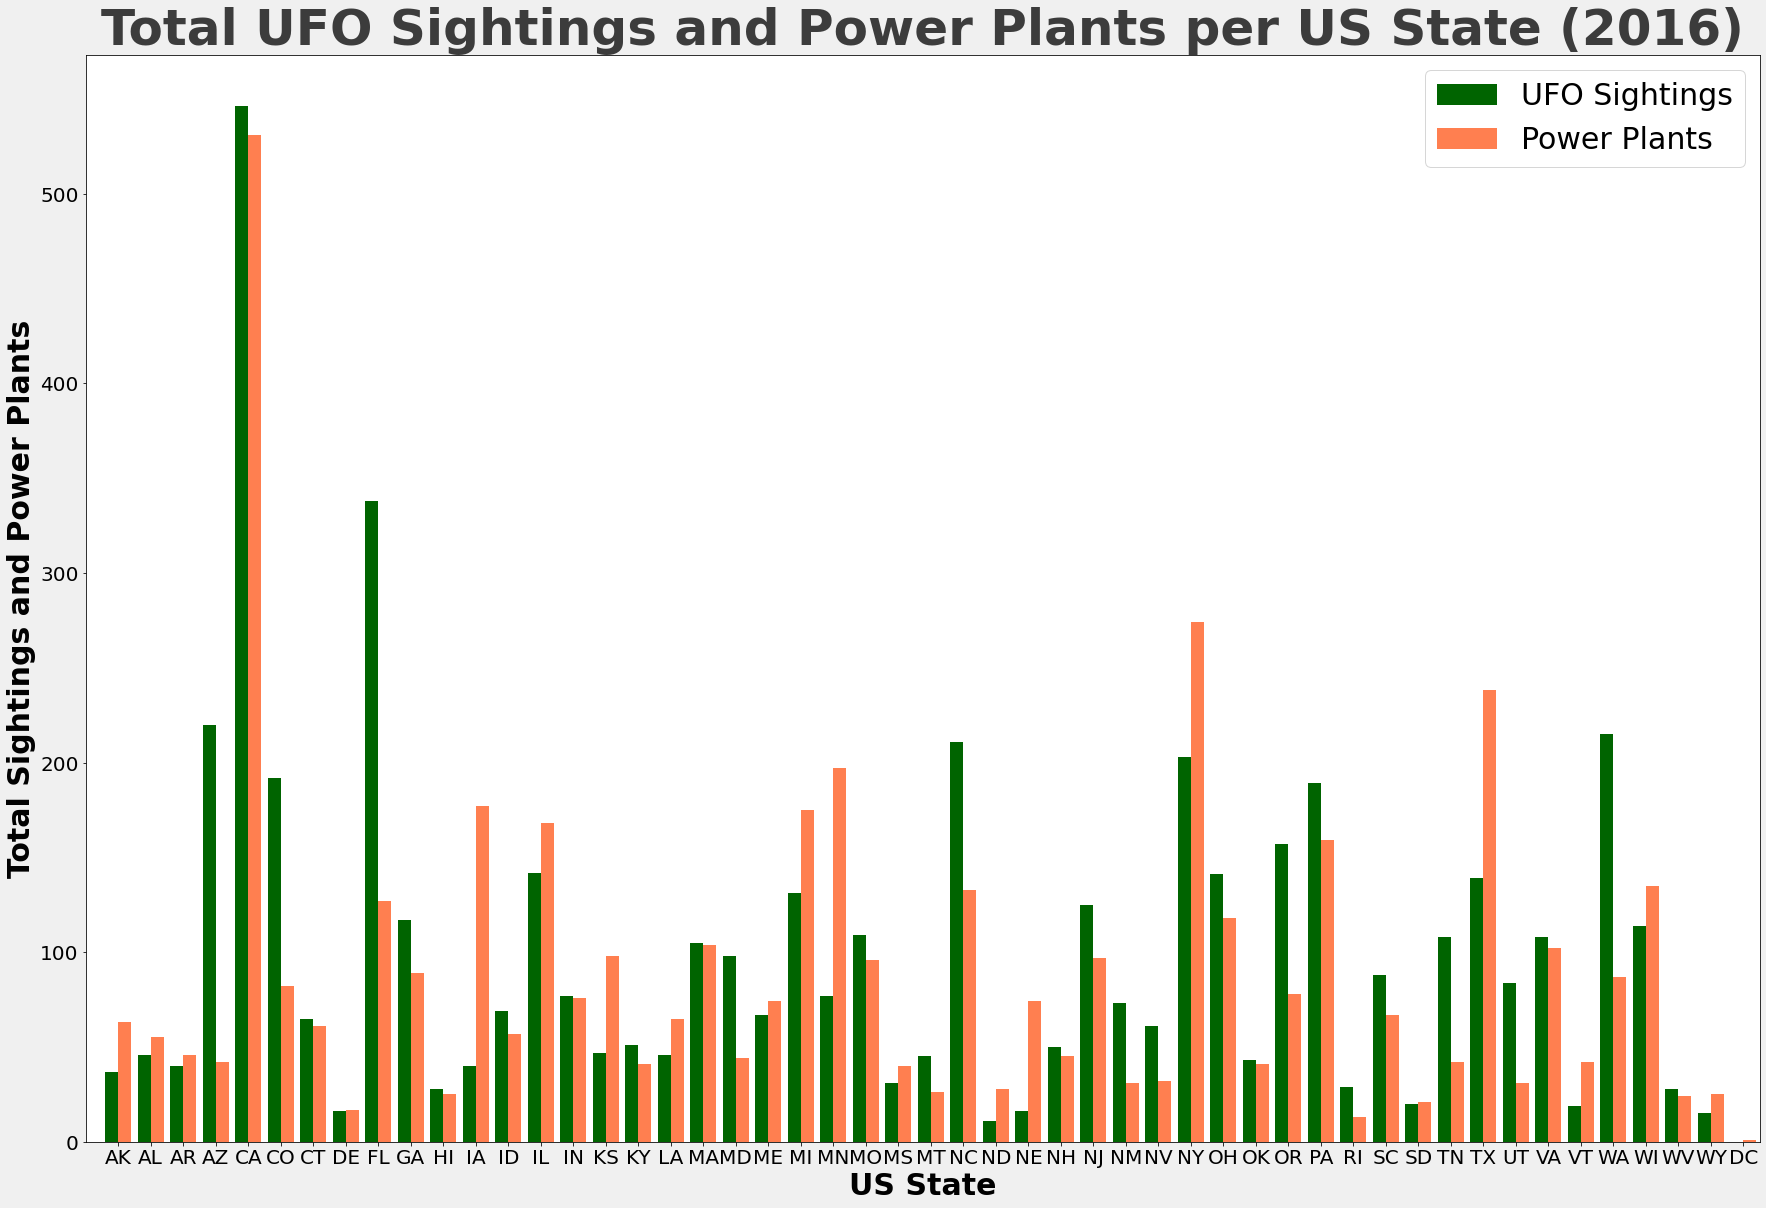

In [237]:
fig, ax = plt.subplots(figsize =(30,20))

fig.set_facecolor('#F0F0F0')
width = .35 

UFOs = ufo2['State']
Power_Plants = power_p['STATE_CODE']

items1, counts1 = zip(*sorted(Counter(UFOs).items()))
items2, counts2 = zip(*sorted(Counter(Power_Plants).items()))

plt.plot(items1+items2, [5]*len(items1+items2), visible=False)

trans1 = matplotlib.transforms.Affine2D().translate(-0.2,0)
trans2 = matplotlib.transforms.Affine2D().translate(+0.2,0)

plt.bar(items1, counts1, label="UFO Sightings", width=0.4, color='darkgreen', transform=trans1+plt.gca().transData)
plt.bar(items2, counts2, label="Power Plants", width=0.4, color='coral', transform=trans2+plt.gca().transData)
plt.xlim(-1,50.5)
plt.legend(fontsize=30,)
ax.set_xlabel('US State', fontweight='bold', fontsize=30)
ax.set_ylabel('Total Sightings and Power Plants', fontweight='bold', fontsize=30)
ax.tick_params(axis='both', colors='black', labelsize='20')
plt.title("Total UFO Sightings and Power Plants per US State (2016)", fontsize=50, fontweight='bold', color='#3C3C3C')
plt.show()

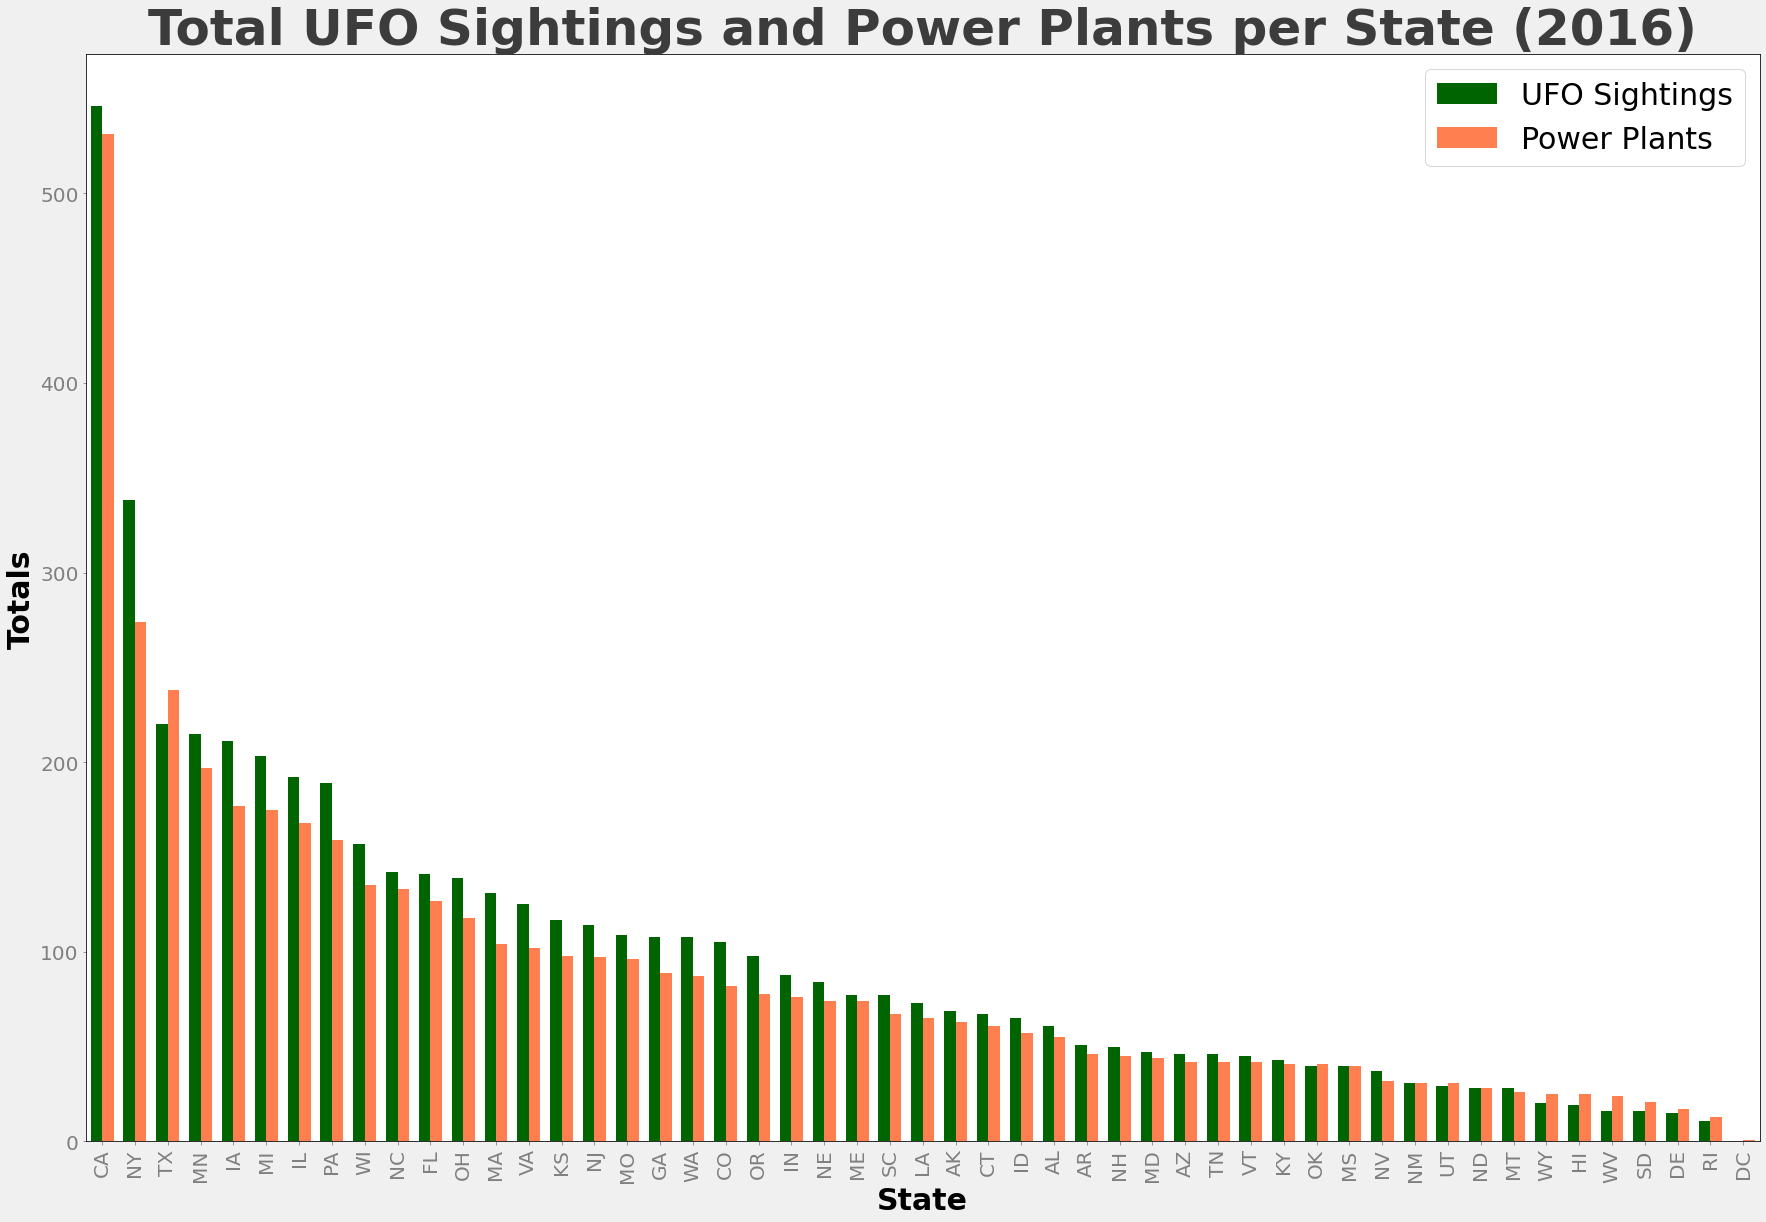

In [238]:
fig, ax = plt.subplots(figsize =(30,20))
fig.set_facecolor('#F0F0F0')
width = .35 

ufo2['State'].value_counts().plot(kind='bar', position=1, color='darkgreen',label="UFO Sightings", width = width)
power_p['STATE_CODE'].value_counts().plot(kind='bar', color='coral', label="Power Plants", position=0, width = width)
plt.xlim(-.5,50.5)
plt.legend(fontsize=30,)
ax.set_xlabel('State', fontweight='bold', fontsize=30)
ax.set_ylabel('Totals', fontweight='bold', fontsize=30)
ax.tick_params(axis='both', colors='grey', labelsize='20')
plt.title("Total UFO Sightings and Power Plants per State (2016)", fontsize=50, fontweight='bold', color='#3C3C3C')

plt.show()

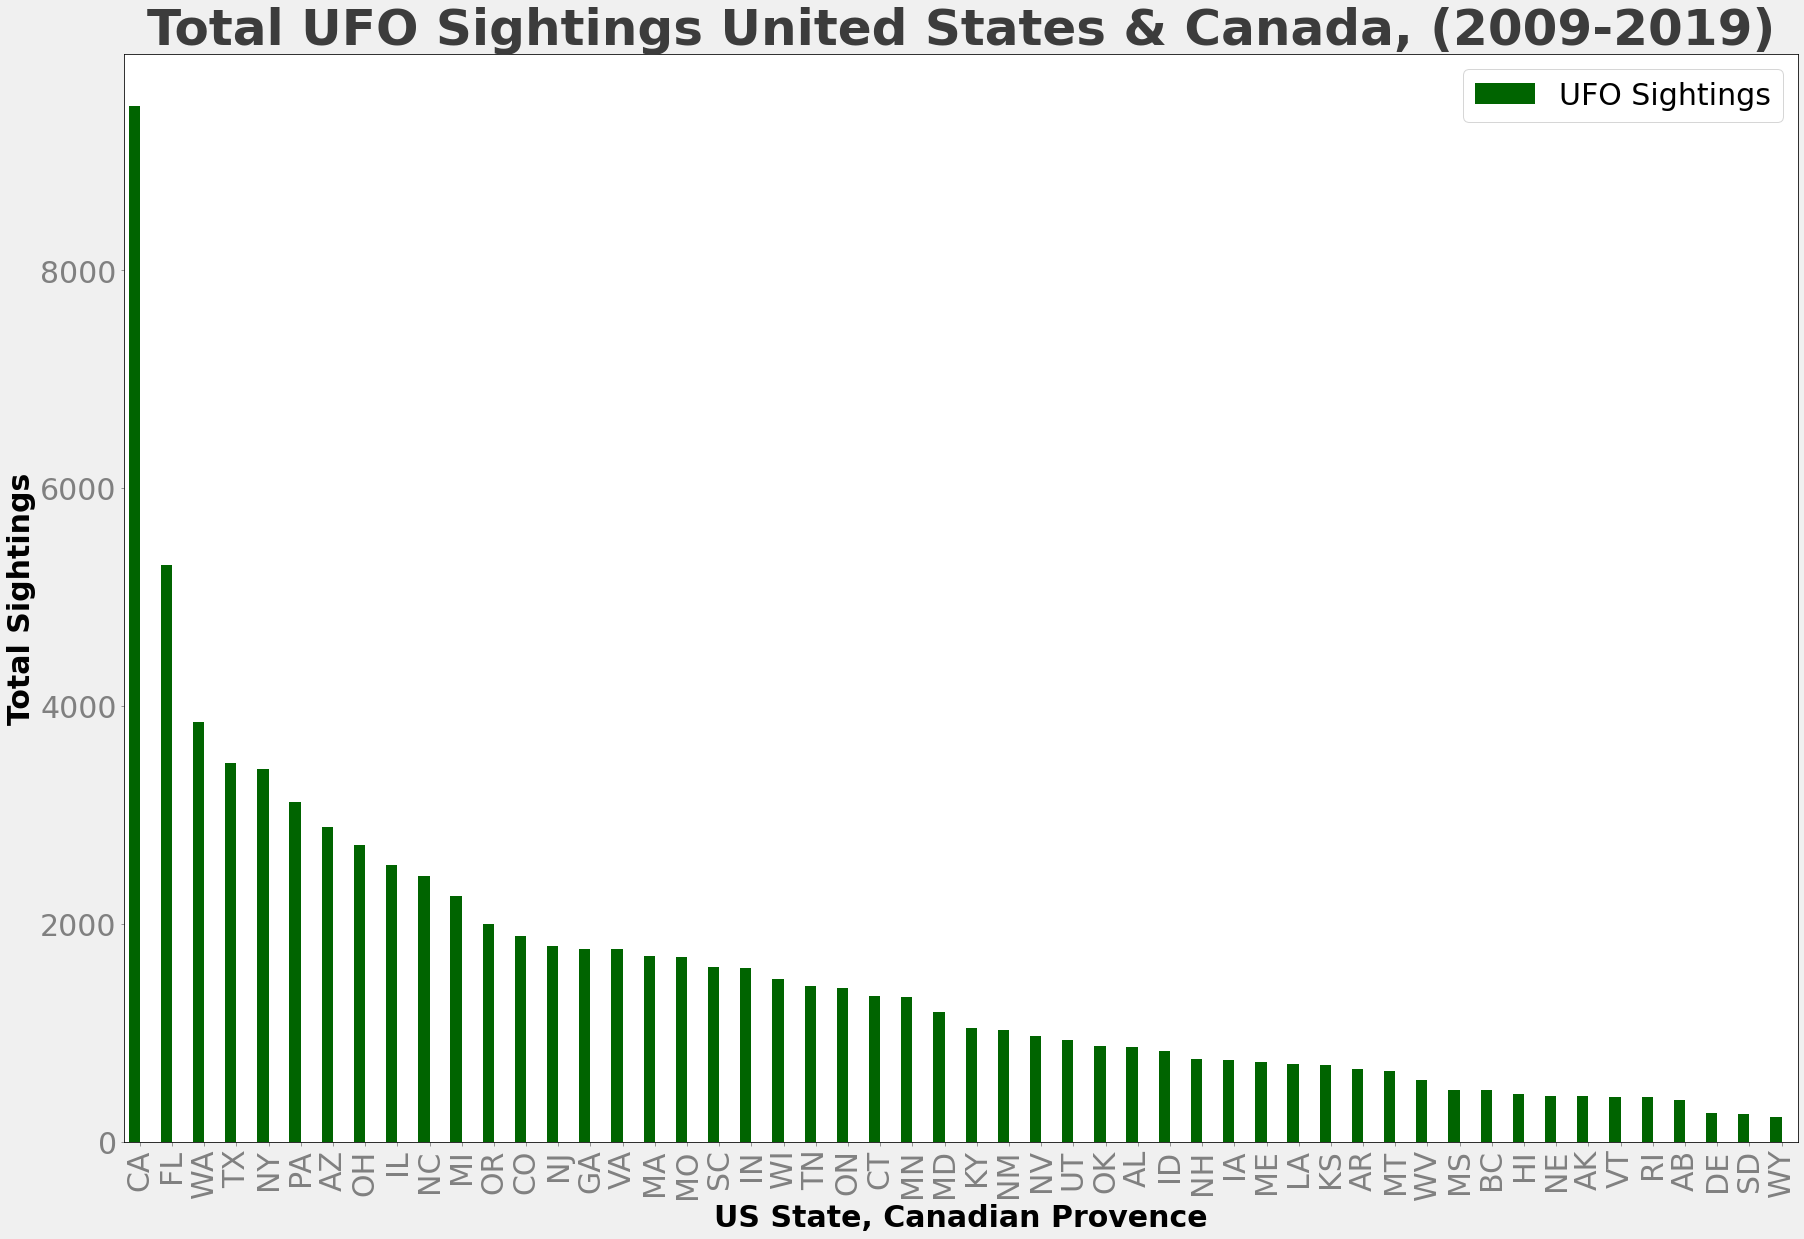

In [239]:
fig, ax = plt.subplots(figsize =(30,20))
fig.set_facecolor('#F0F0F0')
width = .35 

ufo['state'].value_counts().plot(kind='bar', position=1, color='darkgreen',label="UFO Sightings", width = width)
plt.xlim(-.5,51.5)
plt.legend(fontsize=30,)
ax.set_xlabel('US State, Canadian Provence', fontweight='bold', fontsize=30,)
ax.set_ylabel('Total Sightings', fontweight='bold', fontsize=30)
ax.tick_params(axis='both', colors='grey', labelsize='30')
plt.title("Total UFO Sightings United States & Canada, (2009-2019)", fontsize=50, fontweight='bold', color='#3C3C3C')

plt.show()

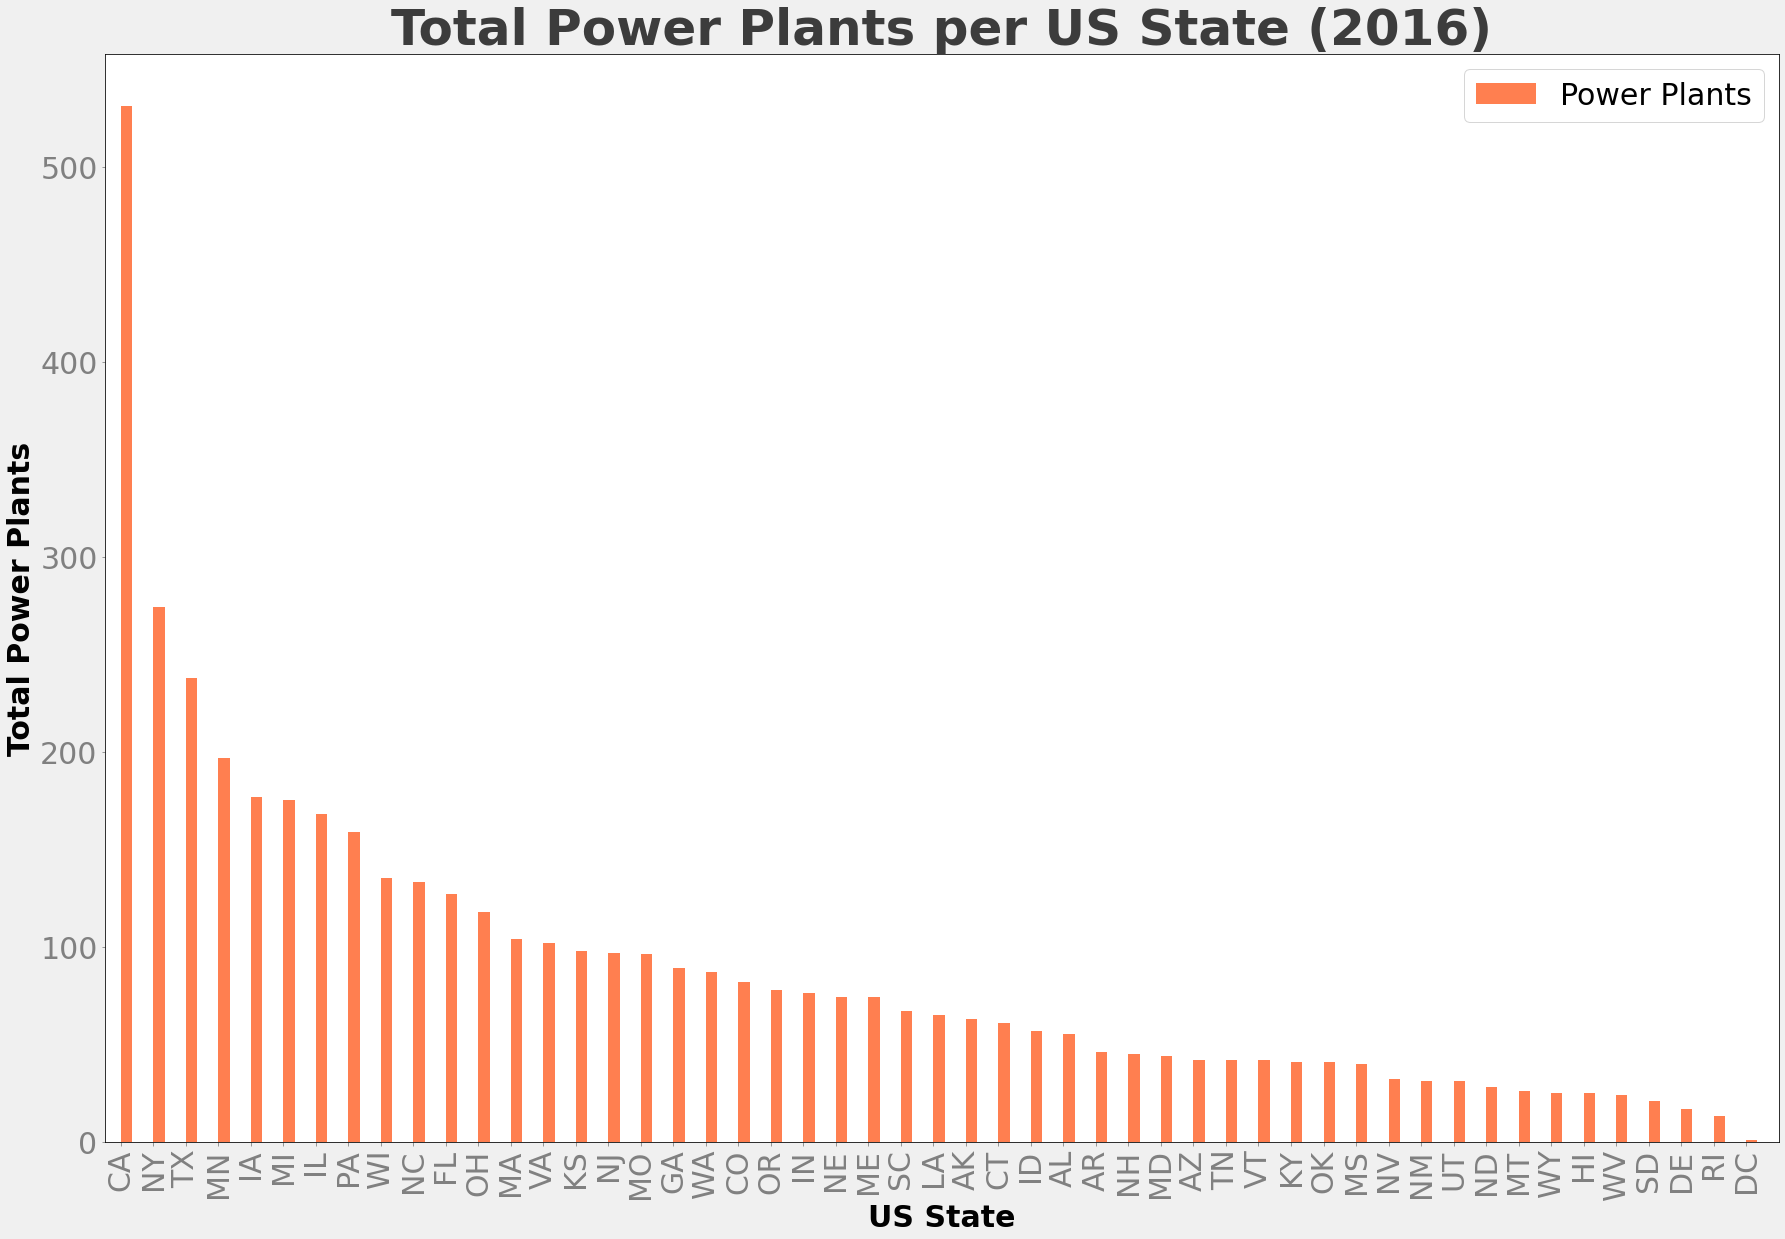

In [240]:
fig, ax = plt.subplots(figsize =(30,20))
fig.set_facecolor('#F0F0F0')
width = .35 

power_p['STATE_CODE'].value_counts().plot(kind='bar', color='coral', label="Power Plants", position=0, width = width)
plt.xlim(-.50,51)
plt.legend(fontsize=30,)
ax.set_xlabel('US State', fontweight='bold', fontsize=30,)
ax.set_ylabel('Total Power Plants', fontweight='bold', fontsize=30)
ax.tick_params(axis='both', colors='grey', labelsize='30')
plt.title("Total Power Plants per US State (2016)", fontsize=50, fontweight='bold', color='#3C3C3C')
plt.show()

In [241]:
import geopandas as gpd
from geopandas import GeoDataFrame

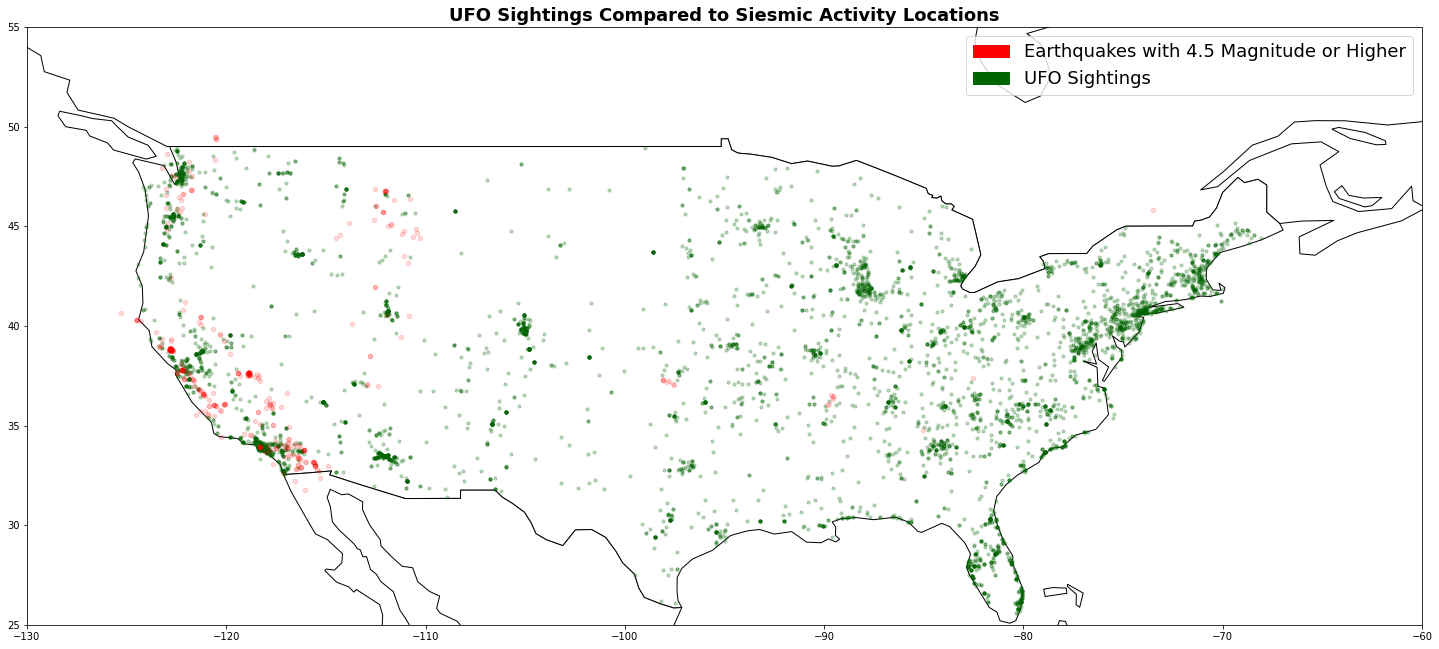

In [242]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'North America'].plot(
    color='white', figsize=(25,25),edgecolor='black')
fig.set_facecolor('#F0F0F0')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   

gdf.plot(ax=ax, color='darkgreen', label="UFO Sightings", markersize = 10, alpha = .25)
gdf2.plot(ax=ax, color='red', label="Earthquakes with 4.5 Magnitude or Higher", markersize = 20, alpha=.15);

ax.set_title("UFO Sightings Compared to Siesmic Activity Locations", fontsize=18, fontweight='bold')

red_patch = mpatches.Patch(color='red', label='Earthquakes with 4.5 Magnitude or Higher')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')

plt.legend(handles=[red_patch, green_patch], fontsize=18)
plt.xlim(-130,-60)
plt.ylim(25,55)
plt.show()

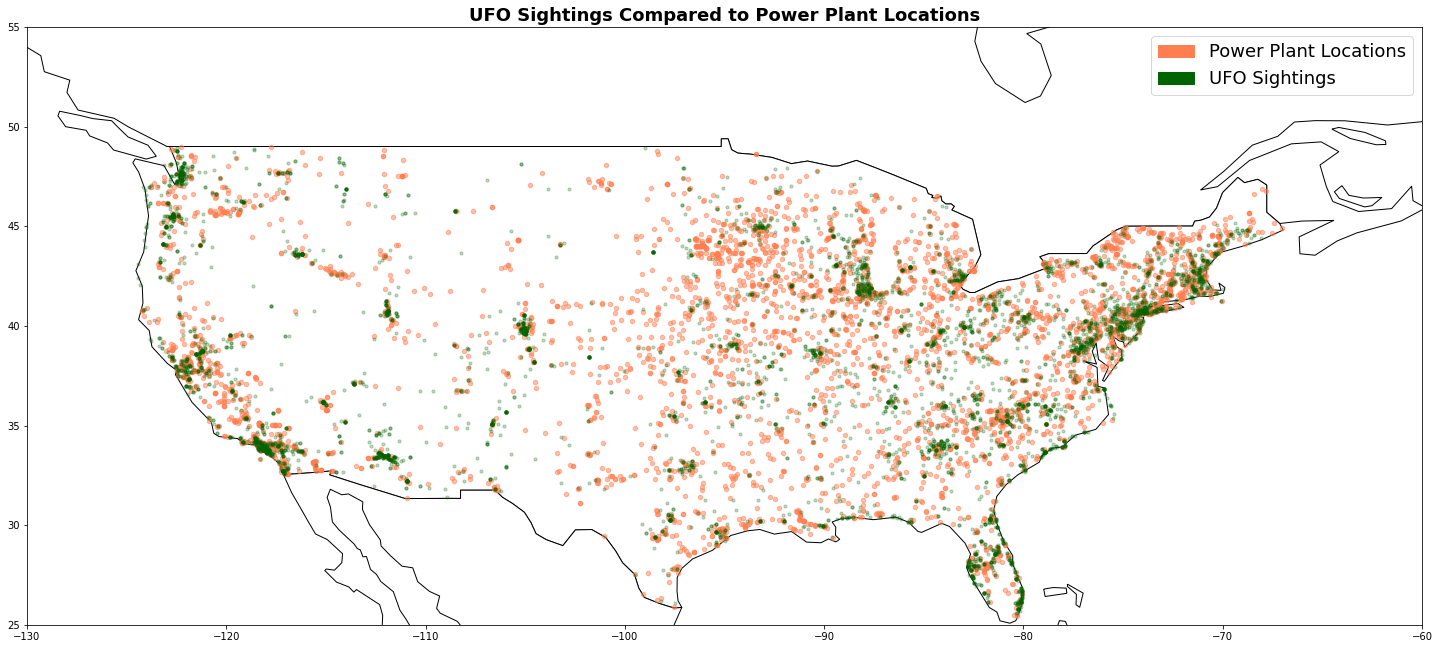

In [243]:
ax = world[world.continent == 'North America'].plot(
    color='white', figsize=(25,25),edgecolor='black')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   

gdf3.plot(ax=ax, color='coral', label="Power Plant Locations", markersize = 20, alpha=.5)
gdf.plot(ax=ax, color='darkgreen', label="UFO Sightings", markersize = 10, alpha = .25)

ax.set_title("UFO Sightings Compared to Power Plant Locations", fontsize=18, fontweight='bold')
coral_patch = mpatches.Patch(color='coral', label='Power Plant Locations')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')
plt.legend(handles=[coral_patch,green_patch], fontsize=18)
plt.xlim(-130,-60)
plt.ylim(25,55)
plt.show()

In [244]:
country = geopandas.read_file('https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json')
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [245]:
def lng_clean1(lng):
  while -66.883 >= lng or lng >= -124.84:
    return lng
  else:
      return np.NaN

In [246]:
def lat_clean1(lat):
  while 49.38 >= lat or lat >= 24.39:
    return lat
  else:
      return np.NaN

In [247]:
ufo3 = ufo2['lng'].apply(lng_clean1)
ufo3

0       -78.905888
1       -85.759407
2      -122.714431
3      -119.708861
4      -111.209290
           ...    
5172   -121.371618
5173   -149.894852
5174   -122.869982
5175    -90.377619
5176    -80.149628
Name: lng, Length: 5027, dtype: float64

In [248]:
ufo4 = ufo2['lat'].apply(lat_clean1)
ufo4

0       38.065229
1       38.254238
2       38.440467
3       36.729529
4       33.229779
          ...    
5172    38.408799
5173    61.216313
5174    44.483395
5175    38.432832
5176    36.092946
Name: lat, Length: 5027, dtype: float64

In [249]:
ufo2['lng'] = ufo3

In [250]:
ufo2['lat'] = ufo4

In [251]:
ufo3=ufo3.dropna()

In [252]:
ufo4=ufo4.dropna()

In [253]:
#https://eric.clst.org/tech/usgeojson/

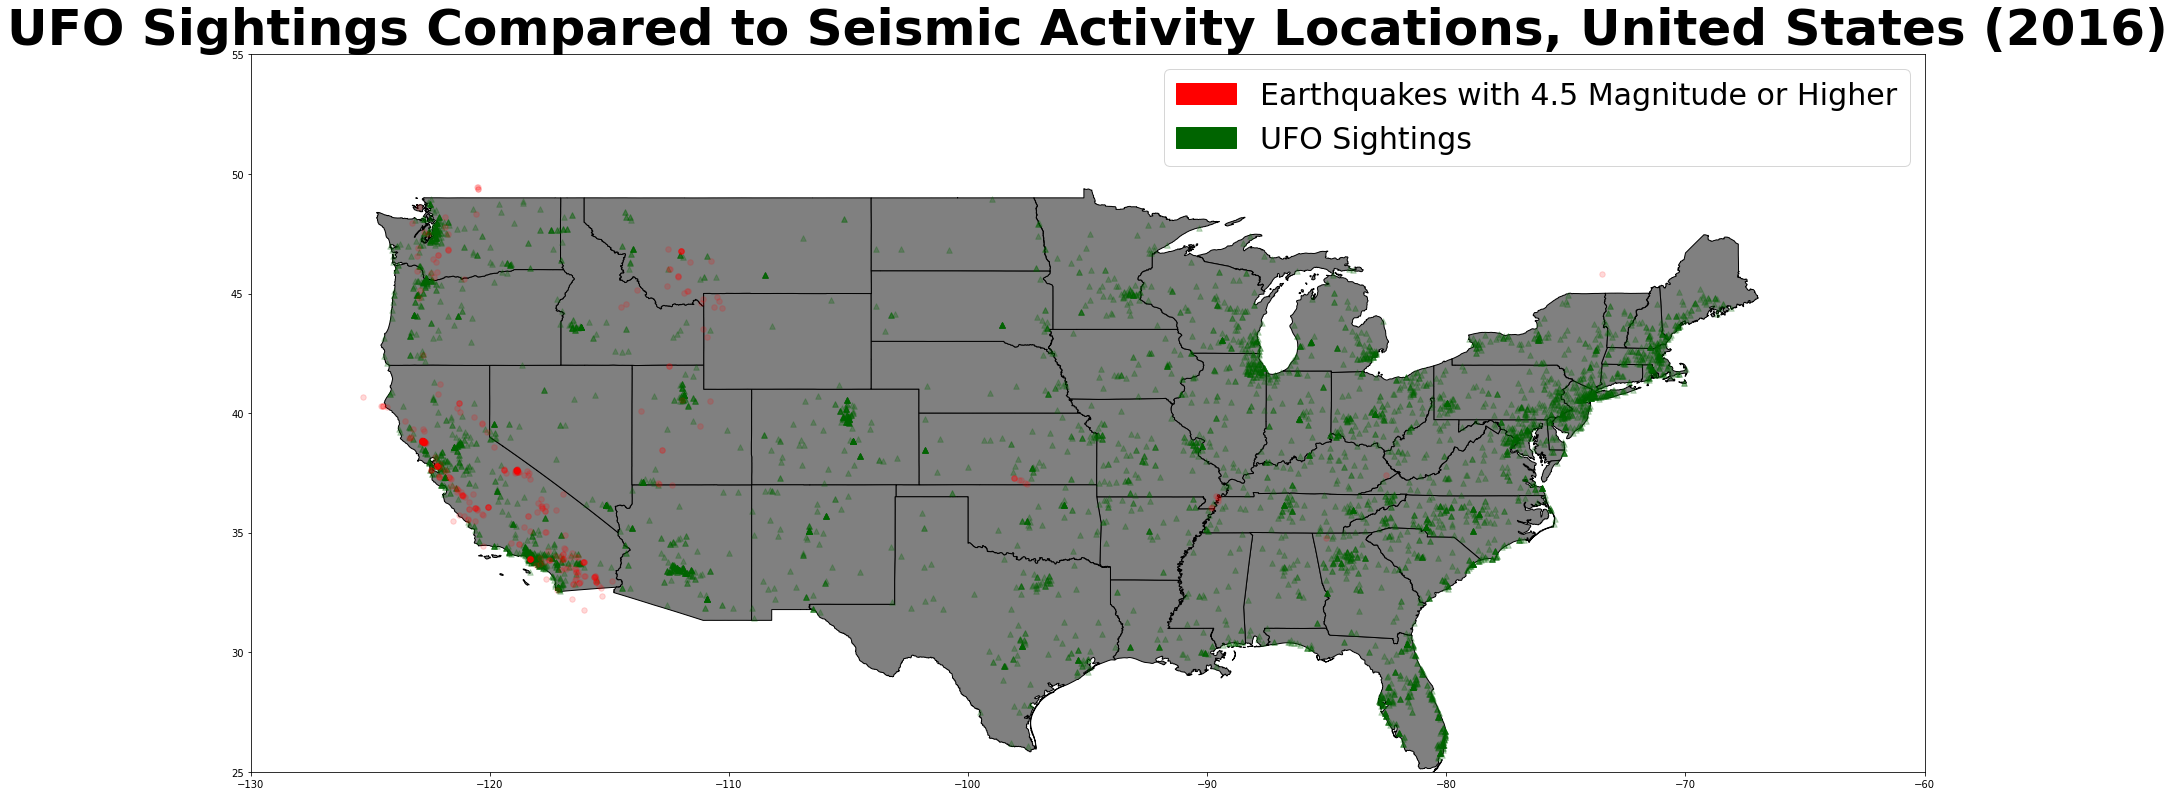

In [254]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax,edgecolor='black', color='grey')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   


gdf.plot(ax=base, color='darkgreen', label="UFO Sightings",  marker='^', markersize = 30, alpha = .25)
gdf2.plot(ax=base, color='red', label="Earthquakes with 4.5 Magnitude or Higher", markersize = 30, alpha=.15);
plt.xlim(-130,-60)
plt.ylim(25,55)

ax.set_title("UFO Sightings Compared to Seismic Activity Locations, United States (2016)", fontsize=50, fontweight='bold')

red_patch = mpatches.Patch(color='red', label='Earthquakes with 4.5 Magnitude or Higher')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')

plt.legend(handles=[red_patch, green_patch], fontsize=30)

plt.show()


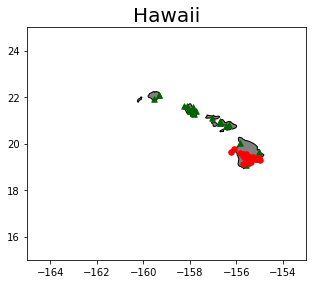

In [255]:
fig, ax = plt.subplots(1, figsize=(5,5))
base = country[country['NAME'].isin(['Alaska']) == False].plot(ax=ax,edgecolor='black', color='grey')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   


gdf.plot(ax=base, color='darkgreen', label="UFO Sightings",  marker='^', markersize = 30, alpha = 1)
gdf2.plot(ax=base, color='red', label="Earthquakes with 4.5 Magnitude or Higher", markersize = 30, alpha=1);
plt.xlim(-165,-153)
plt.ylim(15,25)
plt.title("Hawaii", fontsize=20)

red_patch = mpatches.Patch(color='red', label='Earthquakes with 4.5 Magnitude or Higher')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')

plt.show()


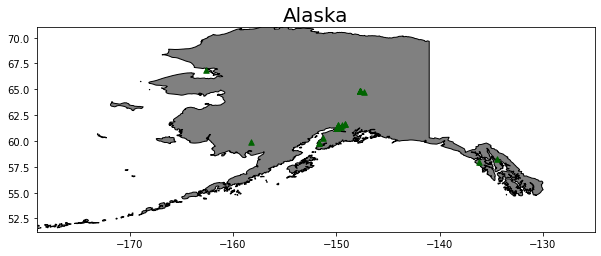

In [256]:
fig, ax = plt.subplots(1, figsize=(10,10))
base = country[country['NAME'].isin(['Hawaii']) == False].plot(ax=ax,edgecolor='black', color='grey')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   


gdf.plot(ax=base, color='darkgreen', label="UFO Sightings",  marker='^', markersize = 30, alpha = 1)
gdf2.plot(ax=base, color='red', label="Earthquakes with 4.5 Magnitude or Higher", markersize = 30, alpha=1);
plt.xlim(-179,-125)
plt.ylim(51.21,71.0)
plt.title("Alaska", fontsize=20)

red_patch = mpatches.Patch(color='red', label='Earthquakes with 4.5 Magnitude or Higher')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')

plt.show()

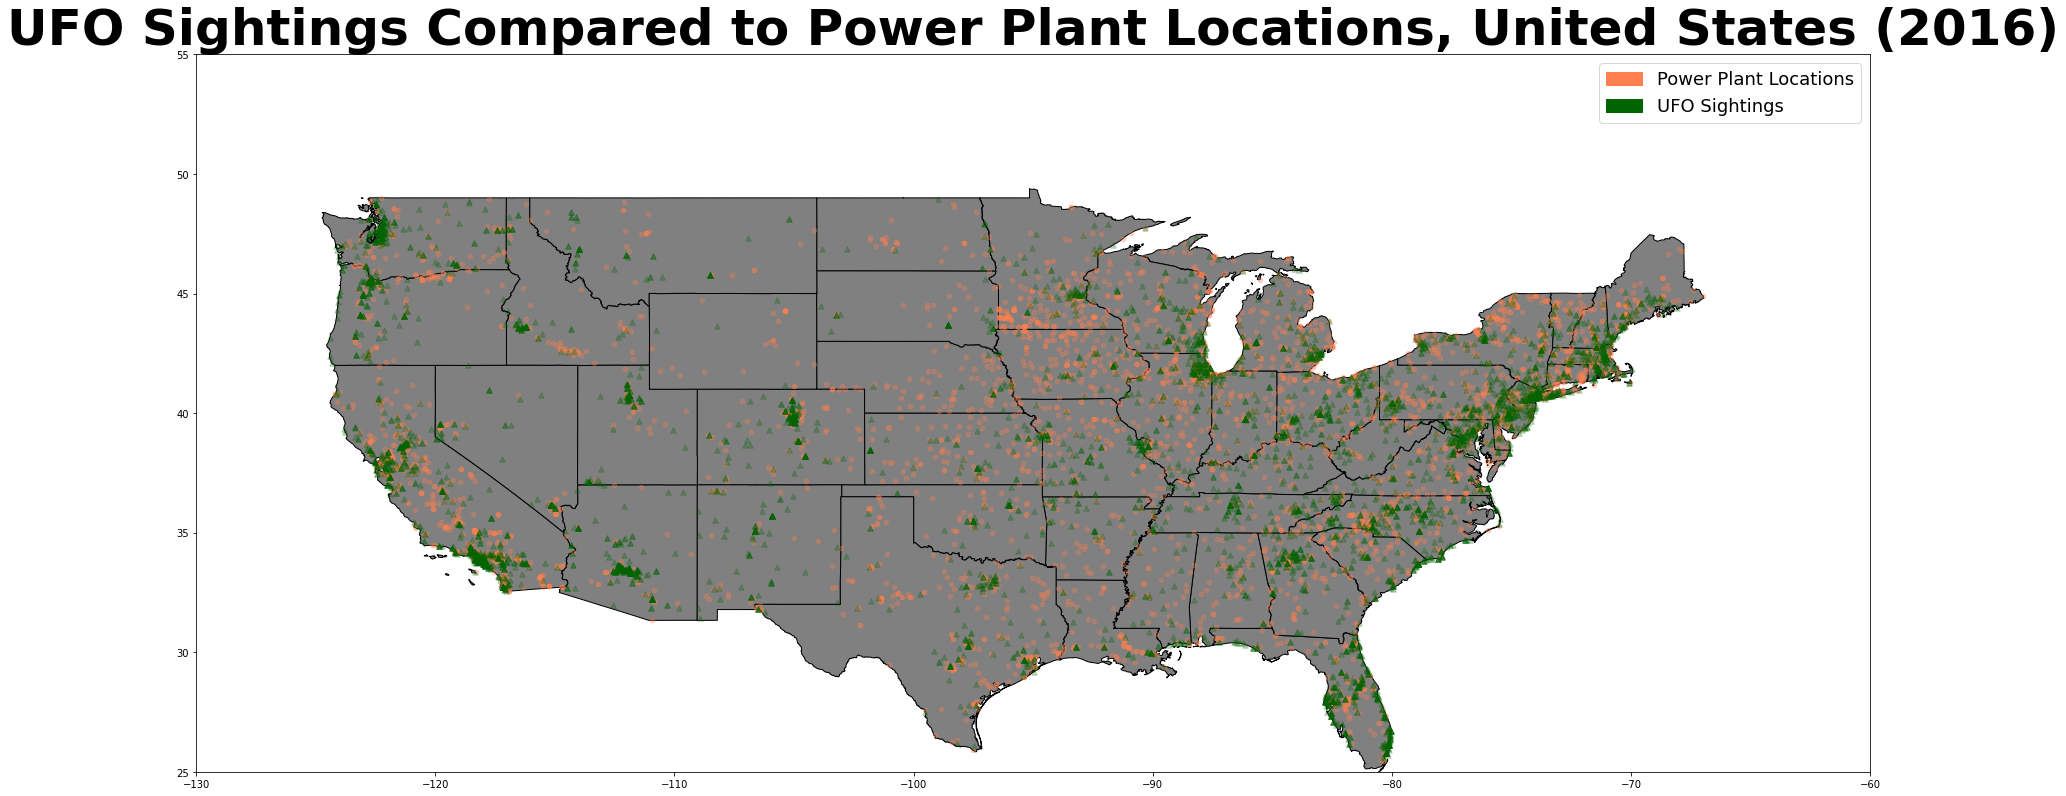

In [257]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, edgecolor='black', color='grey')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   


gdf3.plot(ax=ax, color='coral', label="Power Plant Locations", markersize = 20, alpha=.3)
gdf.plot(ax=ax, color='darkgreen', label="UFO Sightings", marker='^', markersize = 30, alpha = .25)
plt.xlim(-130,-60)
plt.ylim(25,55)

ax.set_title("UFO Sightings Compared to Power Plant Locations, United States (2016)", fontsize=50, fontweight='bold')
coral_patch = mpatches.Patch(color='coral', label='Power Plant Locations')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')
plt.legend(handles=[coral_patch,green_patch], fontsize=18)



plt.show()

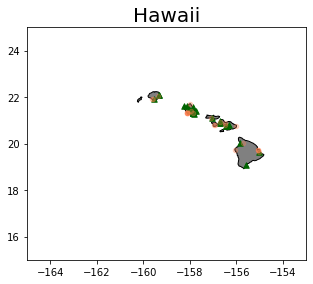

In [258]:
fig, ax = plt.subplots(1, figsize=(5,5))
base = country[country['NAME'].isin(['Alaska']) == False].plot(ax=ax,edgecolor='black', color='grey')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   


gdf.plot(ax=base, color='darkgreen', label="UFO Sightings",  marker='^', markersize = 30, alpha = 1)
gdf3.plot(ax=ax, color='coral', label="Power Plant Locations", markersize = 20, alpha=.3);
plt.xlim(-165,-153)
plt.ylim(15,25)
plt.title("Hawaii", fontsize=20)
coral_patch = mpatches.Patch(color='coral', label='Power Plant Locations')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')


plt.show()

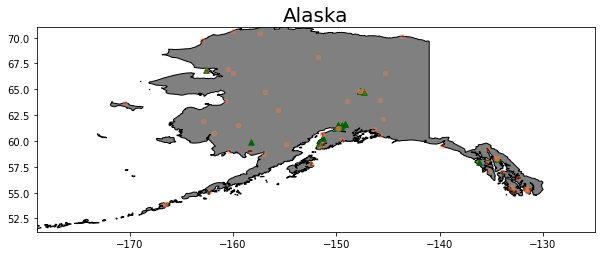

In [259]:
fig, ax = plt.subplots(1, figsize=(10,10))
base = country[country['NAME'].isin(['Hawaii']) == False].plot(ax=ax,edgecolor='black', color='grey')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   


gdf.plot(ax=base, color='darkgreen', label="UFO Sightings",  marker='^', markersize = 30, alpha = 1)
gdf3.plot(ax=ax, color='coral', label="Power Plant Locations", markersize = 20, alpha=.3);
plt.xlim(-179,-125)
plt.ylim(51.21,71.0)
plt.title("Alaska", fontsize=20)

red_patch = mpatches.Patch(color='red', label='Earthquakes with 4.5 Magnitude or Higher')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')

plt.show()

In [260]:
ufo2['State'].value_counts().mean()

100.54

In [261]:
ufo2.shape

(5027, 9)

In [262]:
power_p.shape

(4514, 91)

In [263]:
ufo_sample = ufo2.sample(4000, random_state = 42)

In [264]:
power_sample = power_p.sample(4000, random_state = 42)

In [265]:
quake.shape

(403, 23)

In [266]:
stats.ttest_ind(ufo_sample['State'].value_counts(), power_sample['STATE_CODE'].value_counts(), nan_policy='omit')

Ttest_indResult(statistic=0.10530515500187433, pvalue=0.9163467396574896)

In [267]:
stats.ttest_ind(ufo_sample['lat'], power_sample['Y'], nan_policy='omit')

Ttest_indResult(statistic=-7.303303062216429, pvalue=3.0779357201482254e-13)

In [268]:
stats.ttest_ind(ufo_sample['lng'], power_sample['X'], nan_policy='omit')

Ttest_indResult(statistic=-3.6305916529370266, pvalue=0.00028453919657661885)

In [269]:
quake_sample = quake.sample(400, random_state=42)

In [270]:
ufo_samp2 = ufo2.sample(400, random_state=42)

In [271]:
stats.ttest_ind(ufo_samp2['lat'], quake_sample['latitude'], nan_policy='omit')

Ttest_indResult(statistic=5.232133493242082, pvalue=2.143334052034861e-07)

In [272]:
stats.ttest_ind(ufo_samp2['lng'], quake_sample['longitude'], nan_policy='omit')

Ttest_indResult(statistic=22.759519818439713, pvalue=9.312125376918998e-89)

In [273]:
power_p['ENERGY_SRC'].value_counts()

Natural Gas                                                                                                                                              1250
Water, Conventional or Pumped Storage                                                                                                                     781
Disillate Fuel Oil (all Diesel, and No. 1, No. 2, and No. 4 Fuel Oils)                                                                                    686
Wind                                                                                                                                                      384
Landfill Gas                                                                                                                                              269
Bituminous Coal                                                                                                                                           257
Solar (Photovoltaic, Thermal)                       

In [274]:
power_ca = power_p['STATE_CODE'] == 'CA'
power_ca.head()

0    False
1    False
2    False
3    False
4    False
Name: STATE_CODE, dtype: bool

In [275]:
power_p_some_rows = power_p[(power_p.STATE_CODE == 'CA') | (power_p.STATE_CODE == 'FL') | (power_p.STATE_CODE == 'AZ') | (power_p.STATE_CODE == 'WA') | (power_p.STATE_CODE == 'NC')| (power_p.STATE_CODE == 'NY')]

power_p_some_rows

,X,Y,FID,PGM_SYS_AC,PGM_SYS_ID,REGISTRY_I,PRIMARY_NA,LOCATION_A,CITY_NAME,COUNTY_NAM,STATE_CODE,POSTAL_COD,FEDERAL_FA,TRIBAL_LAN,DATA_QUALI,LAST_REPOR,CREATE_DAT,UPDATE_DAT,LATITUDE83,LONGITUDE8,REF_POINT_,DERIVED_HU,DERIVED_WB,DERIVED_CB,DERIVED_CD,OZONE_8HR_,PB_2008_AR,PM25_1997_,PM25_2006_,OZONE_8HR1,UTILITY_ID,UTILITY_NA,PLANT_CODE,PLANT_NAME,GENERATOR_,PRIME_MOVE,STATUS,NAMEPLATE,SUMMER_CAP,WINTER_CAP,...,SYNCHRONIZ,OWNERSHIP,TURBINES,COGENERATO,SECTOR_NAM,SECTOR,TOPPING_BO,DUCT_BURNE,PLANNED_MO,PLANNED_UP,PLANNED__1,PLANNED__2,PLANNED__3,PLANNED_DE,PLANNED__4,PLANNED__5,PLANNED__6,PLANNED_NE,PLANNED_EN,PLANNED_RE,PLANNED__7,OTHER_MODS,OTHER_MOD_,OTHER_MOD1,PLANNED__8,PLANNED__9,SFG_SYSTEM,PULVERIZED,FLUIDIZED_,SUBCRITICA,SUPERCRITI,ULTRASUPER,CARBONCAPT,STARTUP_SO,STARTUP__1,STARTUP__2,STARTUP__3,ENERGY_SRC,ENERGY_S_6,geometry
2,-73.979022,40.668264,4003,EIA-860,52091,110000807789,NEW YORK METHODIST HOSPITAL,506 SIXTH STREET,BROOKLYN,KINGS,NY,11215-0622,N,,V,,2000-03-01,2014-07-22,40.6683,-73.9790,PLANT ENTRANCE (GENERAL),02030201,020301040205,360470153001000,09,"New York-N. New Jersey-Long Island, NY-NJ-CT",,"New York-N. New Jersey-Long Island, NY-NJ-CT","New York, NY-NJ-CT","New York-N. New Jersey-Long Island, NY-NJ-CT",13484,New York Methodist Hospital,52091,New York Methodist Hospital,3A,IC,OP,0.9,0.7,0.9,...,,S,.,Y,IPP CHP,3,B,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,Natural Gas,,POINT (-73.97902 40.66826)
6,-73.817380,43.247397,4007,EIA-860,54580,110028041367,CURTIS PALMER HYDROELECTRIC,15 PINE STREET,CORINTH,SARATOGA,NY,12822-1319,,,V,,2007-02-08,2010-03-30,43.2474,-73.8174,ENTRANCE POINT OF A FACILITY OR STATION,02020003,020200030501,360910604002004,21,"Albany-Schenectady-Troy, NY",,,,,24931,Palmer Hydroelectric,54580,Curtis Palmer Hydroelectric,C1,HY,OP,2.6,2.5,2.5,...,,S,0,N,IPP Non-CHP,2,,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,"Water, Conventional or Pumped Storage",,POINT (-73.81738 43.24740)
12,-73.896509,40.780691,4013,EIA-860,55375,110043792401,ASTORIA ENERGY POWER GENERATION FACILITY,17-10 STEINWAY ST,ASTORIA,QUEENS,NY,11105,N,,V,,2011-09-06,2014-04-30,40.7807,-73.8965,,02030201,020301020105,360810107011001,14,"New York-N. New Jersey-Long Island, NY-NJ-CT",,"New York-N. New Jersey-Long Island, NY-NJ-CT","New York, NY-NJ-CT","New York-N. New Jersey-Long Island, NY-NJ-CT",22979,Astoria Energy LLC,55375,Astoria Energy,CT1,CT,OP,170.0,156.0,170.0,...,,S,.,N,IPP Non-CHP,2,,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,Natural Gas,"Disillate Fuel Oil (all Diesel, and No. 1, No....",POINT (-73.89651 40.78069)
26,-74.018100,41.076800,4027,EIA-860,10521,110000323070,WYETH PHARMACEUTICALS,401 NORTH MIDDLETOWN ROAD,PEARL RIVER,ROCKLAND,NY,10965-1215,N,,V,,2000-03-01,2014-07-22,41.0768,-74.0181,,02030103,020301030902,360870126002002,17,"New York-N. New Jersey-Long Island, NY-NJ-CT",,"New York-N. New Jersey-Long Island, NY-NJ-CT","New York, NY-NJ-CT","New York-N. New Jersey-Long Island, NY-NJ-CT",10849,Wyeth-Averst Lederle,10521,Lederle Laboratories,3A,CA,OP,1.5,1.5,1.5,...,,S,.,Y,Industrial CHP,7,T,Y,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,Natural Gas,"Disillate Fuel Oil (all Diesel, and No. 1, No....",POINT (-74.01810 41.07680)
27,-73.665116,43.287336,4028,EIA-860,10530,110028027258,FEEDER DAM HYDRO PLANT,144 FEEDER DAM RD.,SOUTH GLENS FALLS,SARATOGA,NY,12803,,,V,,2007-02-08,2011-08-04,43.2873,-73.6651,ENTRANCE POINT OF A FACILITY OR STATION,02020003,020200030506,360910601023002,21,"Albany-Schenectady-Troy, NY",,,,,5914,Erie Boulevard Hydropower LP,10530,Feeder Dam Hydro Plant,1,HY,OP,1.0,0.9,1.0,...,,S,.,N,IPP Non-CHP,2,,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,,,,,,,,,,,,"Water, Conventional or Pumped Storage",,POINT (-73.66512 43.28734)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [276]:
power_p_some_rows = power_p_some_rows.dropna()

In [277]:
power_ca = pd.crosstab(power_p_some_rows['ENERGY_SRC'], power_p_some_rows['STATE_CODE']).dropna()
power_ca

STATE_CODE,AZ,CA,FL,NC,NY,WA
ENERGY_SRC,,,,,,
,0,0,0,0,2,0
Agriculture Crop Byproducts/Straw/Energy Crops,0,1,2,0,0,0
Bituminous Coal,1,4,12,17,7,0
Black Liquor,0,1,3,2,0,4
"Disillate Fuel Oil (all Diesel, and No. 1, No. 2, and No. 4 Fuel Oils)",2,5,16,41,15,2
Geothermal,0,30,0,0,0,0
Jet Fuel,0,1,0,0,0,0
Kerosene,0,0,0,0,9,0
Landfill Gas,0,37,6,9,20,1


In [278]:
power_p_some_rows['ENERGY_SRC'].value_counts()

Natural Gas                                                                                                         367
Water, Conventional or Pumped Storage                                                                               260
Solar (Photovoltaic, Thermal)                                                                                        99
Wind                                                                                                                 86
Disillate Fuel Oil (all Diesel, and No. 1, No. 2, and No. 4 Fuel Oils)                                               81
Landfill Gas                                                                                                         73
Wood/Wood Waste Solids (Paper Pellets, Railroad Ties, Utility Poles, Wood Chips, and Other Wood Solids)              42
Bituminous Coal                                                                                                      41
Geothermal                              

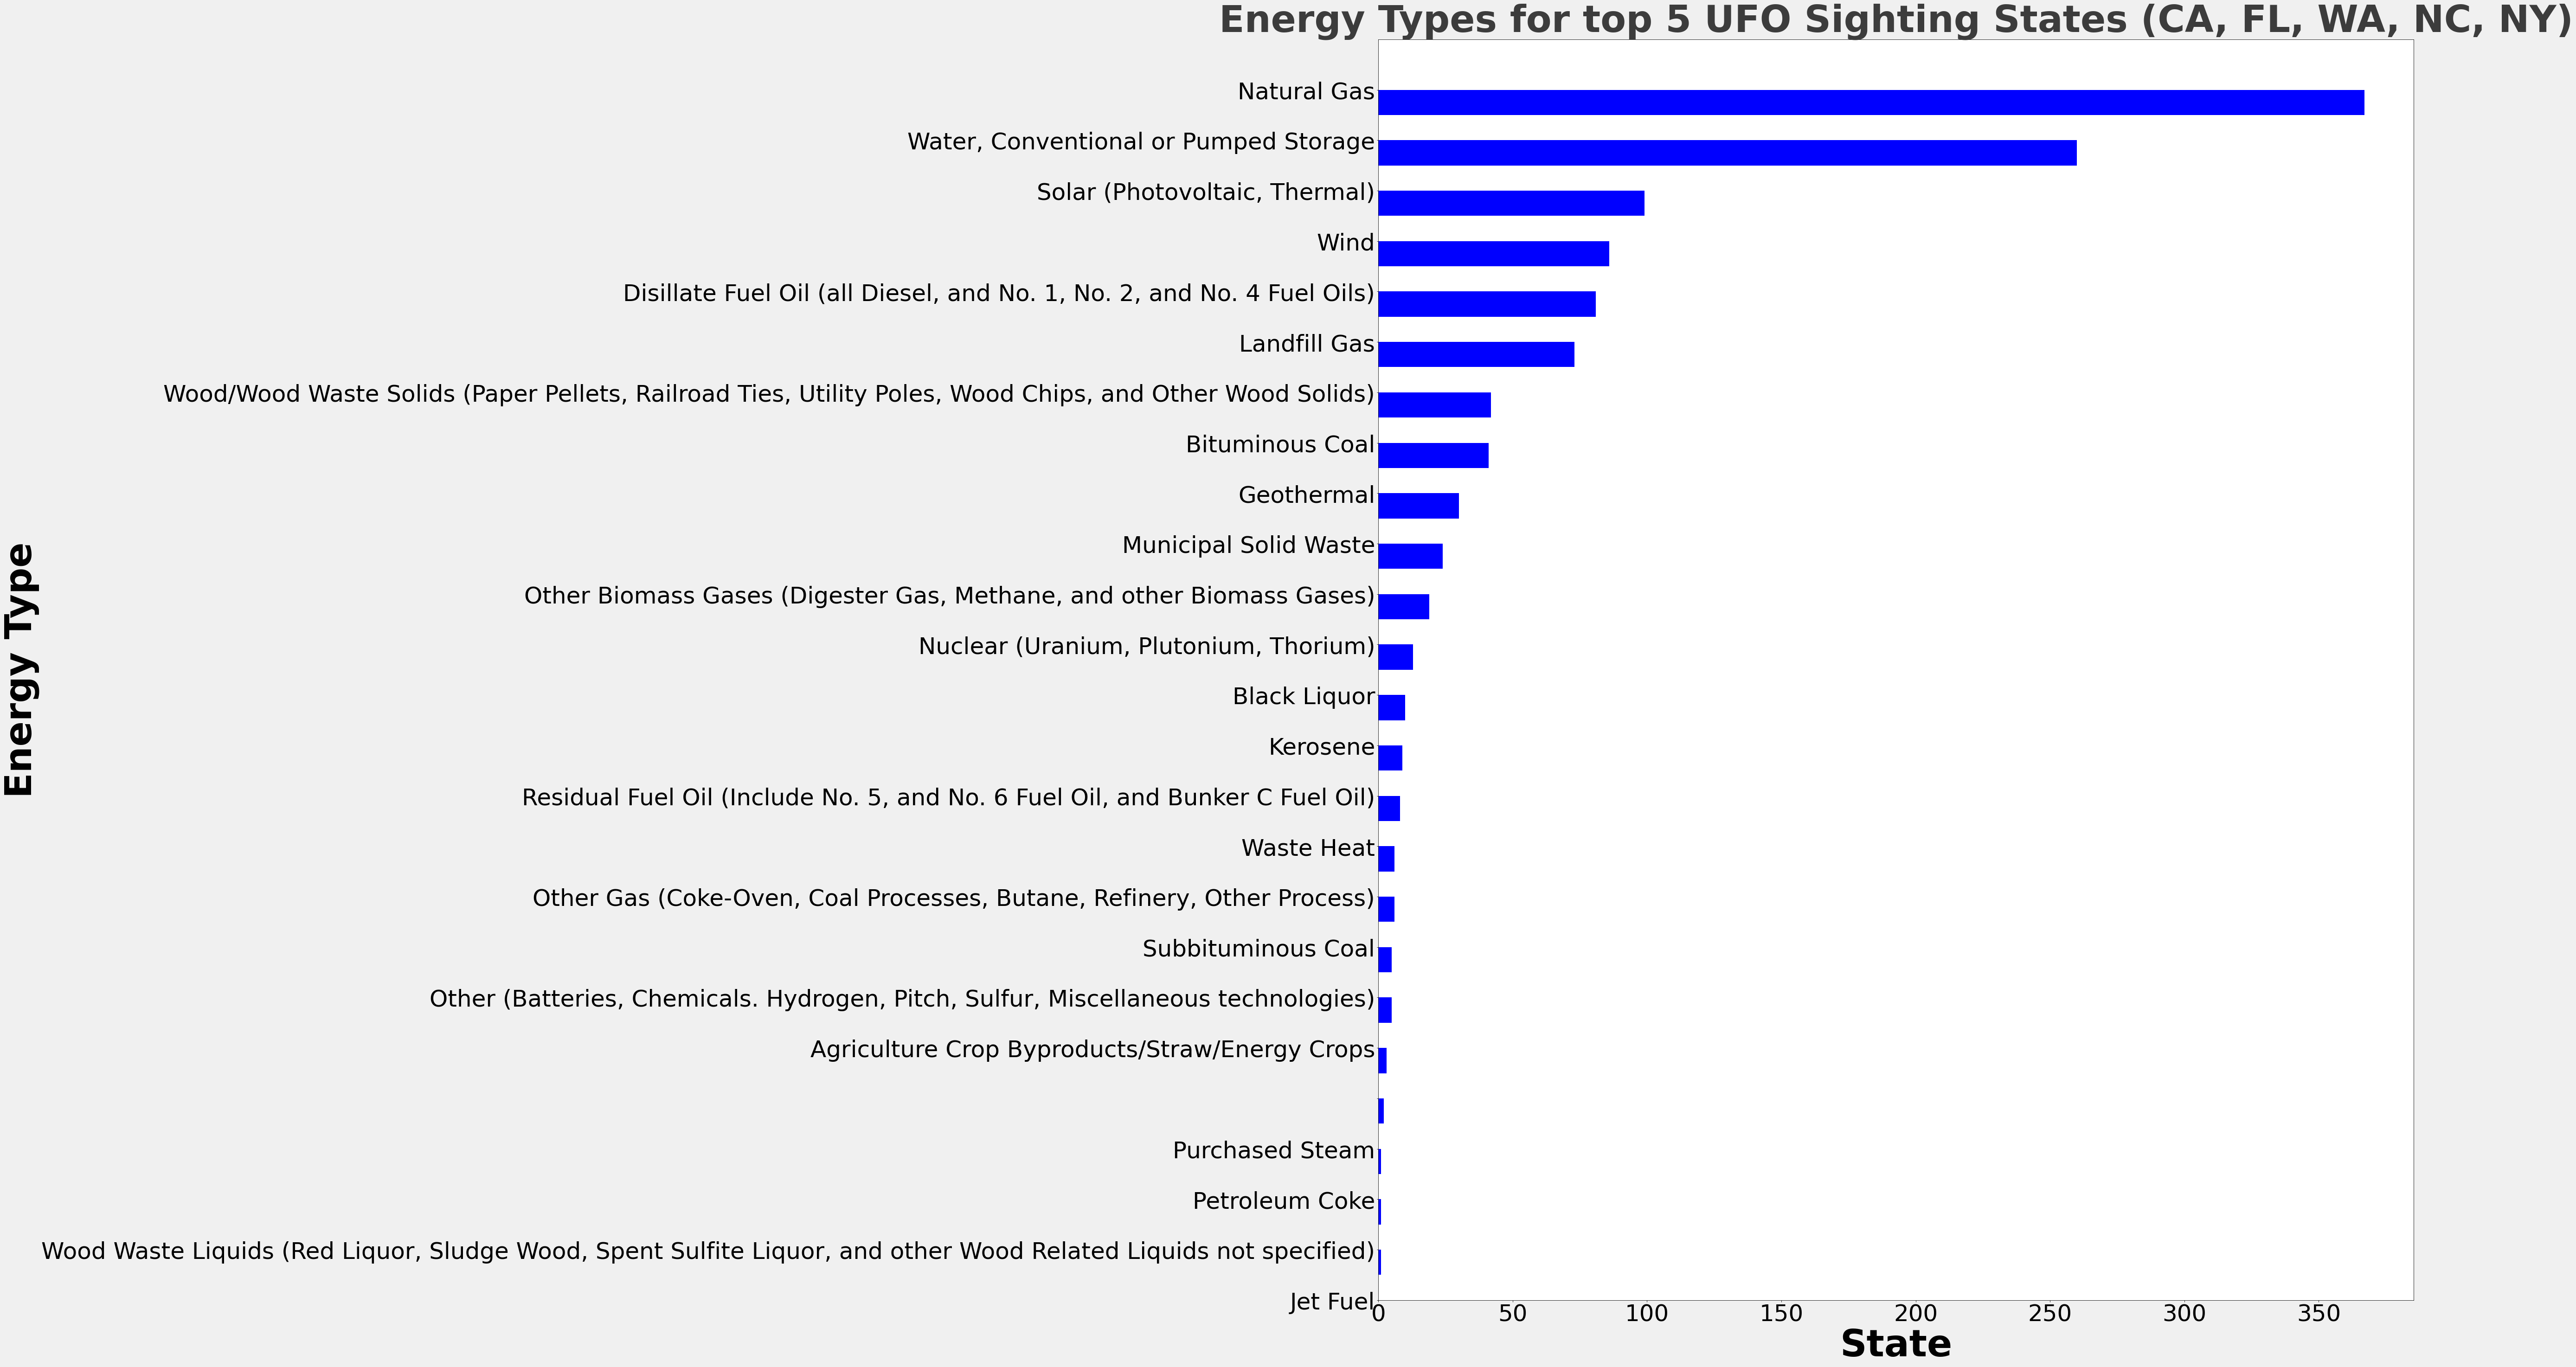

In [279]:
fig, ax = plt.subplots(figsize =(40,50))
fig.set_facecolor('#F0F0F0')
width = .5 

power_p_some_rows['ENERGY_SRC'].value_counts(ascending=True).plot(kind='barh', position=1, color='blue',label="Number of Plants", width = width)
plt.ylim(0,25)
plt.legend(fontsize=30,)
ax.set_xlabel('State', fontweight='bold', fontsize=80,)
ax.set_ylabel('Energy Type', fontweight='bold', fontsize=80)
ax.tick_params(axis='both', colors='black', labelsize='50')
plt.title("Energy Types for top 5 UFO Sighting States (CA, FL, WA, NC, NY)", fontsize=80, fontweight='bold', color='#3C3C3C')
ax.get_legend().remove()
plt.show()

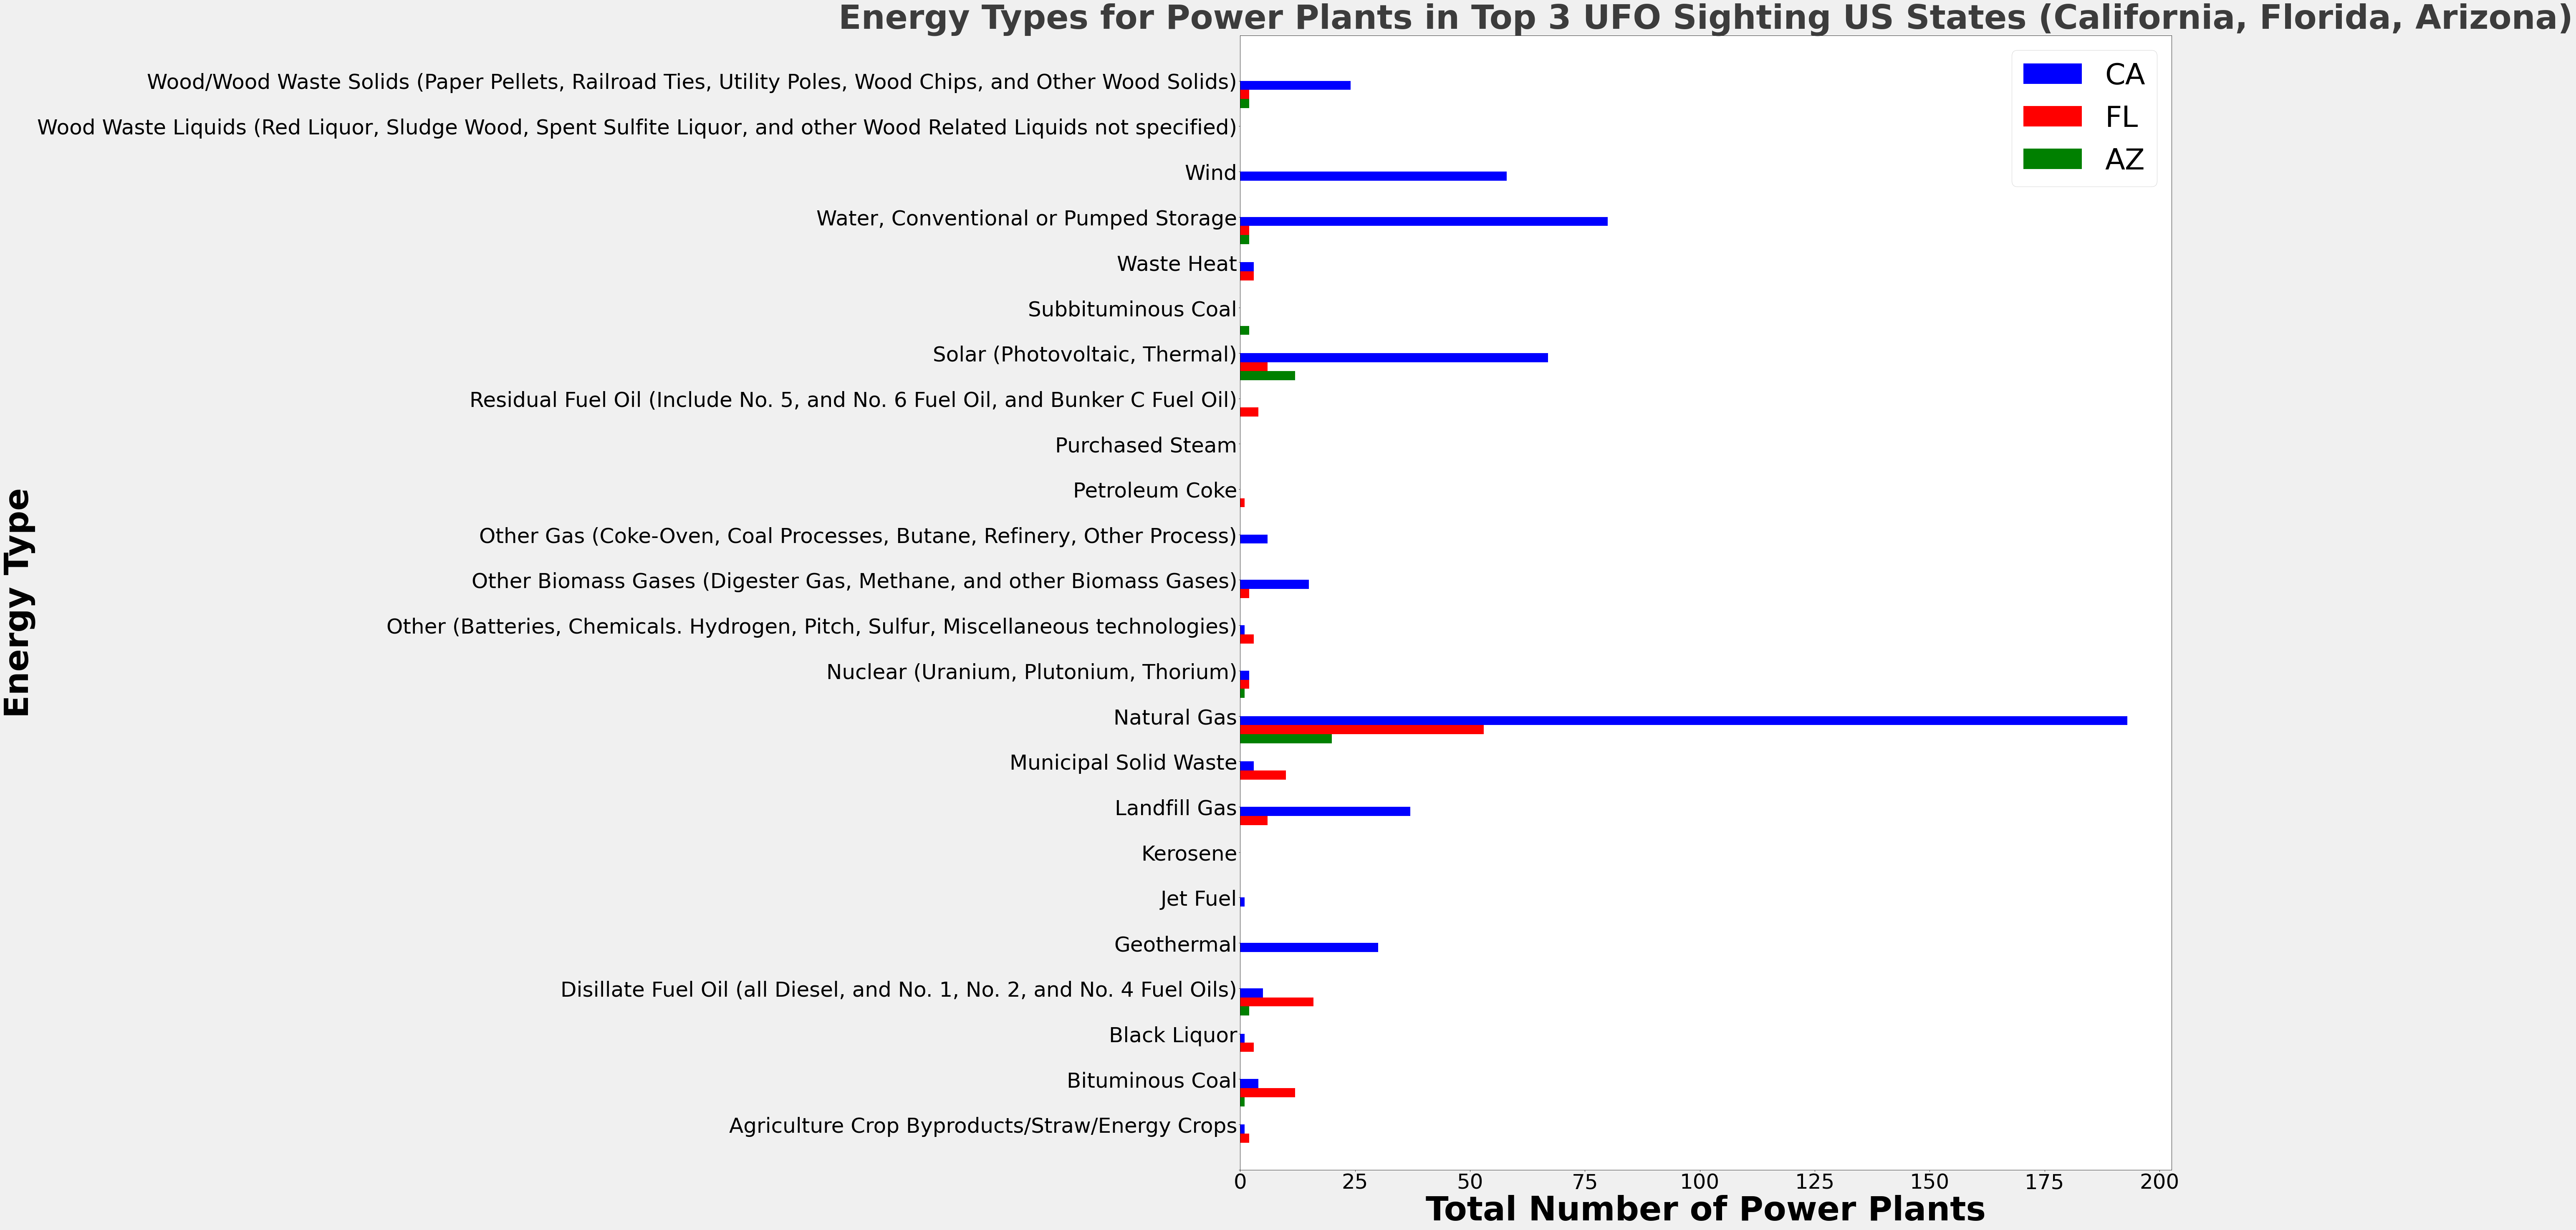

In [280]:
fig, ax = plt.subplots(figsize =(40,50))
fig.set_facecolor('#F0F0F0')
width = .2 

power_ca['CA'].sort_index().plot(kind='barh', position=1, color='blue',label="CA", width = width)
power_ca['FL'].sort_index().plot(kind='barh', position=2, color='red',label="FL", width = width)
power_ca['AZ'].sort_index().plot(kind='barh', position=3, color='green',label="AZ", width = width)

plt.ylim(0,25)
ax.set_xlabel('Total Number of Power Plants', fontweight='bold', fontsize=80,)
ax.set_ylabel('Energy Type', fontweight='bold', fontsize=80)
ax.tick_params(axis='both', colors='black', labelsize='50')
plt.title("Energy Types for Power Plants in Top 3 UFO Sighting US States (California, Florida, Arizona)", fontsize=80, fontweight='bold', color='#3C3C3C')
plt.legend(fontsize=70)
plt.show()